# NBA Salary EDA for 2022-23 Season

This is an exploratory data analysis of the NBA players' stats and salaries for the 2022-23 season.  The dataset we will be using is the one created in the "Cleaning" notebook within this repository.  Some of the analysis will also be taken or referred to from the "Analysis" notebook from this repo as well.

#### Data Description:

The data taken for this project was from www.basketballreference.com. The salary page for the 22-23 season was taken, along with the 22-23 season players totals page.

The dataset consists of 464 players, their stats for the season, and their salary for the season.  Because not every player had a recorded salary, we have removed players that had no recorded salary. Despite this, with 464 players we feel that our dataset contains enough of the population to be able to conduct analysis and make assumptions with it.

Importing Libraries and Data:

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats
import pandas as pd
import numpy as np
import os
from IPython.display import HTML, display, Markdown

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
current_directory = os.getcwd()
data_folder = os.path.join(os.path.dirname(current_directory), 'data')
file_path = os.path.join(data_folder, '2023StatsAndSalaries.csv')

work = pd.read_csv(file_path)
df = work.copy()

#### Data Exploration:

Reviewing the dataframe and making sure everything loaded in correctly before anything is done to it.

In [36]:
title = "Data Frame Info:"
display(Markdown(f"#### {title}"))
display(df.head())
print("df shape:", df.shape,
 "\nDF column names and data types:\n",
  df.dtypes)

#### Data Frame Info:

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PlayerID,salary
0,Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.48,29,108,0.27,167,296,0.56,0.52,87,124,0.70,100,228,328,50,31,30,59,102,508,achiupr01,2840160
1,Steven Adams,C,29,MEM,42,42,1133,157,263,0.60,0,1,0.00,157,262,0.60,0.60,47,129,0.36,214,271,485,97,36,46,79,98,361,adamsst01,17926829
2,Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.54,1,12,0.08,601,1102,0.55,0.54,324,402,0.81,184,504,688,240,88,61,187,208,1529,adebaba01,30351780
3,Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.43,81,228,0.35,84,158,0.53,0.53,56,69,0.81,43,78,121,67,16,15,41,99,467,agbajoc01,3918360
4,Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.47,94,266,0.35,153,259,0.59,0.56,108,144,0.75,85,286,371,97,45,48,60,143,696,aldamsa01,2094120


df shape: (464, 31) 
DF column names and data types:
 Player       object
Pos          object
Age           int64
Tm           object
G             int64
GS            int64
MP            int64
FG            int64
FGA           int64
FG%         float64
3P            int64
3PA           int64
3P%         float64
2P            int64
2PA           int64
2P%         float64
eFG%        float64
FT            int64
FTA           int64
FT%         float64
ORB           int64
DRB           int64
TRB           int64
AST           int64
STL           int64
BLK           int64
TOV           int64
PF            int64
PTS           int64
PlayerID     object
salary        int64
dtype: object


In [37]:
#setting player name as index for readability
df.set_index('Player', inplace=True)

#### Univariate Analysis:

In [38]:
describe = df[['salary']].describe().T
display(describe)

,count,mean,std,min,25%,50%,75%,max
salary,464.00,9485579.85,10808855.23,58493.00,1958801.50,4580760.00,12622500.00,48070014.00


A quick description of our salary column shows a minimum salary of 58 thousand, a maximum salary of 48 million, and a mean of 9.48 million dollars. Let's look at out maximum and minimum earners quickly.

In [39]:
# Perform the query to filter the DataFrame based on salary condition and select columns
min_and_max = df.query('salary in [salary.min(), salary.max()]')[['Age', 'salary']]
# Format the 'salary' column with a dollar sign and commas for thousands
min_and_max['salary'] = min_and_max['salary'].apply(lambda x: '${:,}'.format(x))

# Print the formatted result
min_and_max.round(1)

,Age,salary
Player,,
Stephen Curry,34,"$48,070,014"
Stanley Umude,23,"$58,493"


34 year old Stephen Curry is our top earner, and 34 year old Stanley Umude is our lowest earner. There's quite a disparity in these salaries, and with a mean salary of about 9.5 million it makes us wonder about the skewness of the salary distribution and whether it is approximately normal, left leaning, or right leaning.

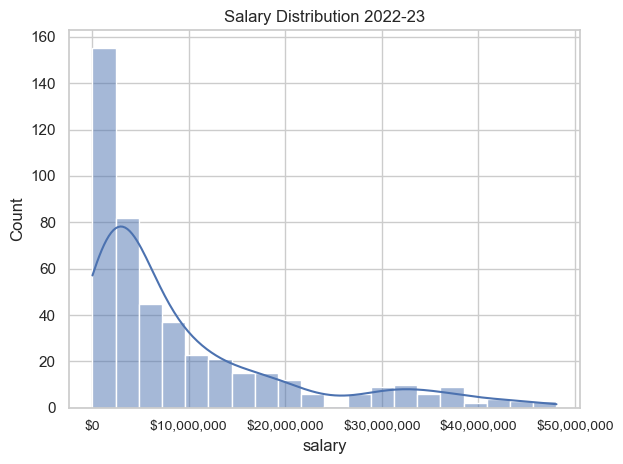

In [40]:
ax = sns.histplot(data = df, x='salary', kde=True, bins = 20)
ax.set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
# Format x-axis ticks with dollar signs and commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Adjust x-axis tick font size
ax.xaxis.set_tick_params(labelsize=10)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

It appears that the dataset is skewed to the right. This means it's likely less of a question of if we have outliers, but instead how many do we have.

First let's split the upper and lower halves of the salary to get a better look at the distribution to see if there's any observations to be made.

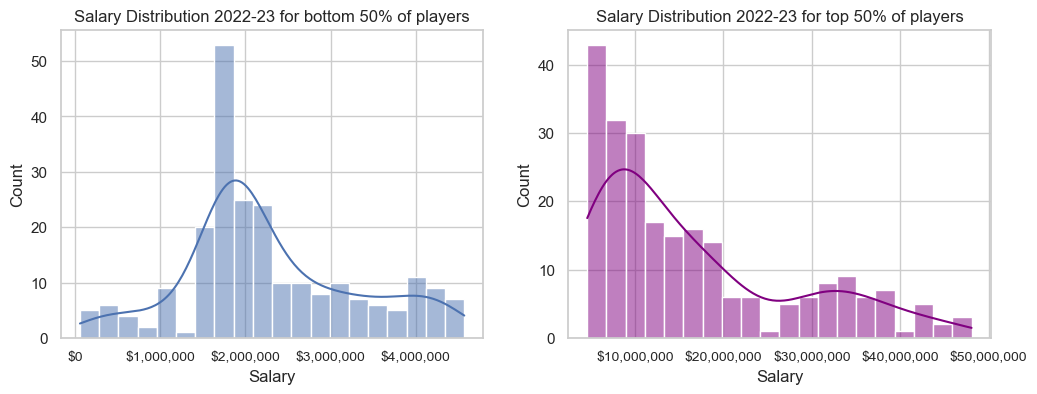

In [41]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'wspace': 0.2})

# Plot 1
medianLess = df.query('salary <= salary.median()')

ax1 = sns.histplot(data=medianLess, x='salary', kde=True, bins=20, ax=axs[0])
ax1.set(title='Salary Distribution 2022-23 for bottom 50% of players')
ax1.ticklabel_format(style='plain')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax1.xaxis.set_tick_params(labelsize=10)
ax1.set_xlabel('Salary')
ax1.set_ylabel('Count')

# Plot 2
medianMore = df.query('salary > salary.median()')

ax2 = sns.histplot(data=medianMore, x='salary', kde=True, bins=20, ax=axs[1], color='purple')
ax2.set(title='Salary Distribution 2022-23 for top 50% of players')
ax2.ticklabel_format(style='plain')
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax2.xaxis.set_tick_params(labelsize=10)
ax2.set_xlabel('Salary')
ax2.set_ylabel('Count')

#plt.tight_layout()
plt.show()


It seems the salary distribution gravitates towards 3 figures; 2 million, 10 million, and a little over 30 million dollars.

A quick look at the NBA Veteran Minimum contract shows that the floor is set at 953,000 for rookies, players with 10 years experience or more receive a minimum of 2.72 million, and everything inbetween for players with years of experience between that. This suggests that a lot of players are making close to their minimum based on what they can be paid by the league.

Another large portion of the players seem to have made just short of 10 million this year. From there we see a normal drop off and then a dip back up at 30-35 million.  The wealth certainly seems to be distributed towards the top players in the league.

With a better understanding of the salary distribution we can create a box plot to see what outliers we can find.

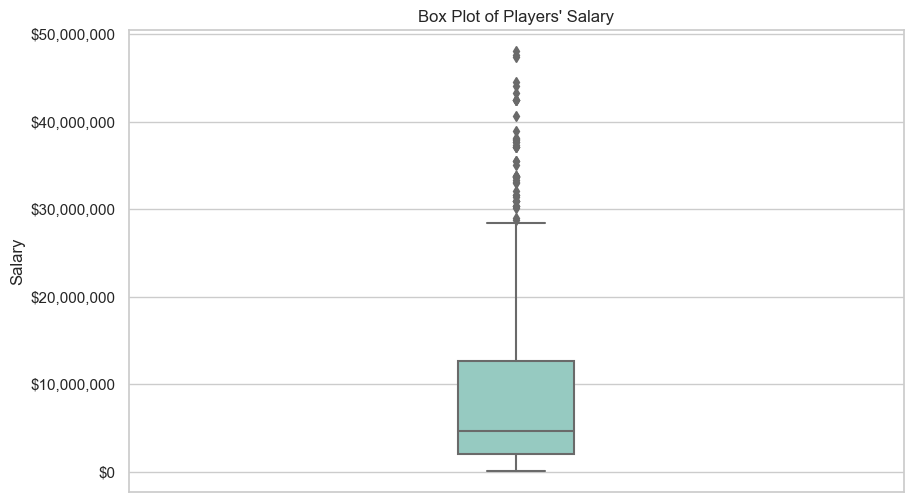

In [42]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))


# Show the plot
plt.show()

Seaborn's boxplot seems to think that any salary over about 29 million is an outlier, but that seems like a lot of outliers. Just to be sure we'll conduct our own outlier calculation and compare the two.

In [63]:
#OUTLIERS
outlier_calc = df['salary'].mean() + 3 * df['salary'].std()
print('${:,.2f}'.format(outlier_calc.round()))

outliers = df.query('salary > @outlier_calc')
outliers.loc[:, 'salary']= outliers['salary'].apply(lambda x: '${:,}'.format(x))

display(outliers.loc[:, ['salary','Pos', 'Age', 'G', 'MPG', 'PPG', '2P%','3P%','eFG%', 'FG%', 'FT%', 'AST/TO','APG', 'TRPG']].sort_values(by='salary', ascending=False).round(2))


$41,912,146.00


,salary,Pos,Age,G,MPG,PPG,2P%,3P%,eFG%,FG%,FT%,AST/TO,APG,TRPG
Player,,,,,,,,,,,,,,
Stephen Curry,"$48,070,014",PG,34,56,34.66,29.43,0.58,0.43,0.61,0.49,0.92,1.97,6.29,6.09
Russell Westbrook,"$47,559,433",PG,34,73,29.12,15.88,0.49,0.31,0.48,0.44,0.66,2.16,7.55,5.79
John Wall,"$47,345,760",PG,32,34,22.21,11.35,0.46,0.30,0.46,0.41,0.68,2.22,5.24,2.71
LeBron James,"$44,474,988",PF,38,55,35.53,28.91,0.58,0.32,0.55,0.50,0.77,2.11,6.82,8.31
Kevin Durant,"$44,119,845",PF,34,47,35.57,29.06,0.62,0.40,0.61,0.56,0.92,1.51,5.00,6.66
Bradley Beal,"$43,279,250",SG,29,50,33.46,23.20,0.55,0.36,0.55,0.51,0.84,1.87,5.42,3.92
Giannis Antetokounmpo,"$42,492,492",PF,28,63,32.13,31.10,0.60,0.28,0.57,0.55,0.64,1.46,5.70,11.78
Paul George,"$42,492,492",SG,32,56,34.62,23.79,0.52,0.37,0.54,0.46,0.87,1.64,5.14,6.11
Kawhi Leonard,"$42,492,492",SF,31,52,33.62,23.83,0.55,0.42,0.57,0.51,0.87,2.32,3.92,6.50


Our outlier calculation defines an outlier as any salary above 41.9 million, of which there are 10. Intuitively that feels more correct than seaborn's calculation. A look at the list of players shows us that all of these players are on either 4 or 5 year max contract deals, which makes sense that they are outliers as there's only a handful of players good enough to earn a maximum contract.  

Some notable observations of the outliers:
- Of the 10 outliers, 4 of them are point guards. This helps explain why the point guard mean salary is so high compared to the other positions. 
- 8 players are over the age of 30, with LeBron James being the oldest at 38. This is encouraging for younger players hoping to be able to earn as they age over time.
- 2 of these players, Russell Westbrook and John Wall, have a much lower PPG than the others. They are both over 30, so it's possible that these players are near the end of a max contract they signed back in their "prime", or perhaps they got injured and haven't been able to play relative to their earnings.
- There are no Centers in the list of outliers. The Center position had the 3rd highest mean salary and the 4th highest median salary.

Finally let's look at average salary by position. Since our dataset is skewed right, we'll look at the median salary by position as a better measure, but we'll look at mean salary as well.

In [44]:
# Calculate the mean salary for each position and sort by descending mean salary
positionMean = df[['salary', 'Pos']].groupby(['Pos']).mean().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Mean Salary by Position'
positionMean.rename(columns={'salary': 'Mean Salary by Position'}, inplace=True)
# Format mean salary values as currency with commas
positionMean['Mean Salary by Position'] = positionMean['Mean Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the mean salary DataFrame
positionMean = positionMean.style.set_properties(**{'text-align': 'center'})

# Calculate the median salary for each position and sort by descending median salary
positionMedian = df[['salary', 'Pos']].groupby(['Pos']).median().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Median Salary by Position'
positionMedian.rename(columns={'salary': 'Median Salary by Position'}, inplace=True)
# Format median salary values as currency with commas
positionMedian['Median Salary by Position'] = positionMedian['Median Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the median salary DataFrame
positionMedian = positionMedian.style.set_properties(**{'text-align': 'center'})

display(positionMedian, positionMean)

,Median Salary by Position
Pos,
PG,"$5,853,659"
PF,"$4,866,840"
SG,"$4,500,000"
C,"$4,124,280"
SF,"$3,936,960"


,Mean Salary by Position
Pos,
PG,"$12,183,395"
PF,"$9,403,577"
C,"$9,338,676"
SG,"$8,495,827"
SF,"$8,278,663"


The mean salary is more than double the median salary, which is significant.  It goes to show that while most NBA players are making millions per year, the star players are earning in a year what the average players might earn in their entire career.

### Bivariate Analysis:

Now that we've taken a look at the distribution and description of the salary data, checked for skewness and outliers, and also examined the mean and median salary by position, we're interested in what columns influence salary.

To do this we need to create some features that we think might be helpful in explaining what influences salary, and then run a correlation analysis with all of the columns.  We'll display the results in a heatmap as a raw table of percentages is not an appealing way to examine data.

In [45]:
#Making a method for feature creation
def create_columns(df):
    '''Creating columns that may prove important for analysis'''
    #copying df
    df = df.copy()
    #stat creation
    df['PPG'] = (df['PTS'] / df['G'])
    df['APG'] = (df['AST'] / df['G'])
    df['TRPG'] = (df['TRB'] / df['G'])
    df['SPG'] = (df['STL'] / df['G'])
    df['BPG'] = (df['BLK'] / df['G'])
    df['MPG'] = (df['MP'] / df['G'])
    #dollar stat creation
    df['dollarPerMinute'] = (df['salary'] / df['MP']).round(2)
    df['dollarPerFG'] = (df['salary'] / df['FG']).round(2)
    df['dollarPerPoint'] = (df['salary'] / df['PTS']).round(2)
    #some players have 0 turnovers so we have to handle for when we divide by 0.
    df['AST/TO'] = np.where(df['TOV'] != 0, df['AST'] / df['TOV'], np.nan)
    
    # Replace infinite values with NaN
    inf_cols = ['AST/TO', 'dollarPerMinute', 'dollarPerFG', 'dollarPerPoint']
    df[inf_cols] = df[inf_cols].replace([np.inf, -np.inf], np.nan)

    return df

In [46]:
df = create_columns(df)

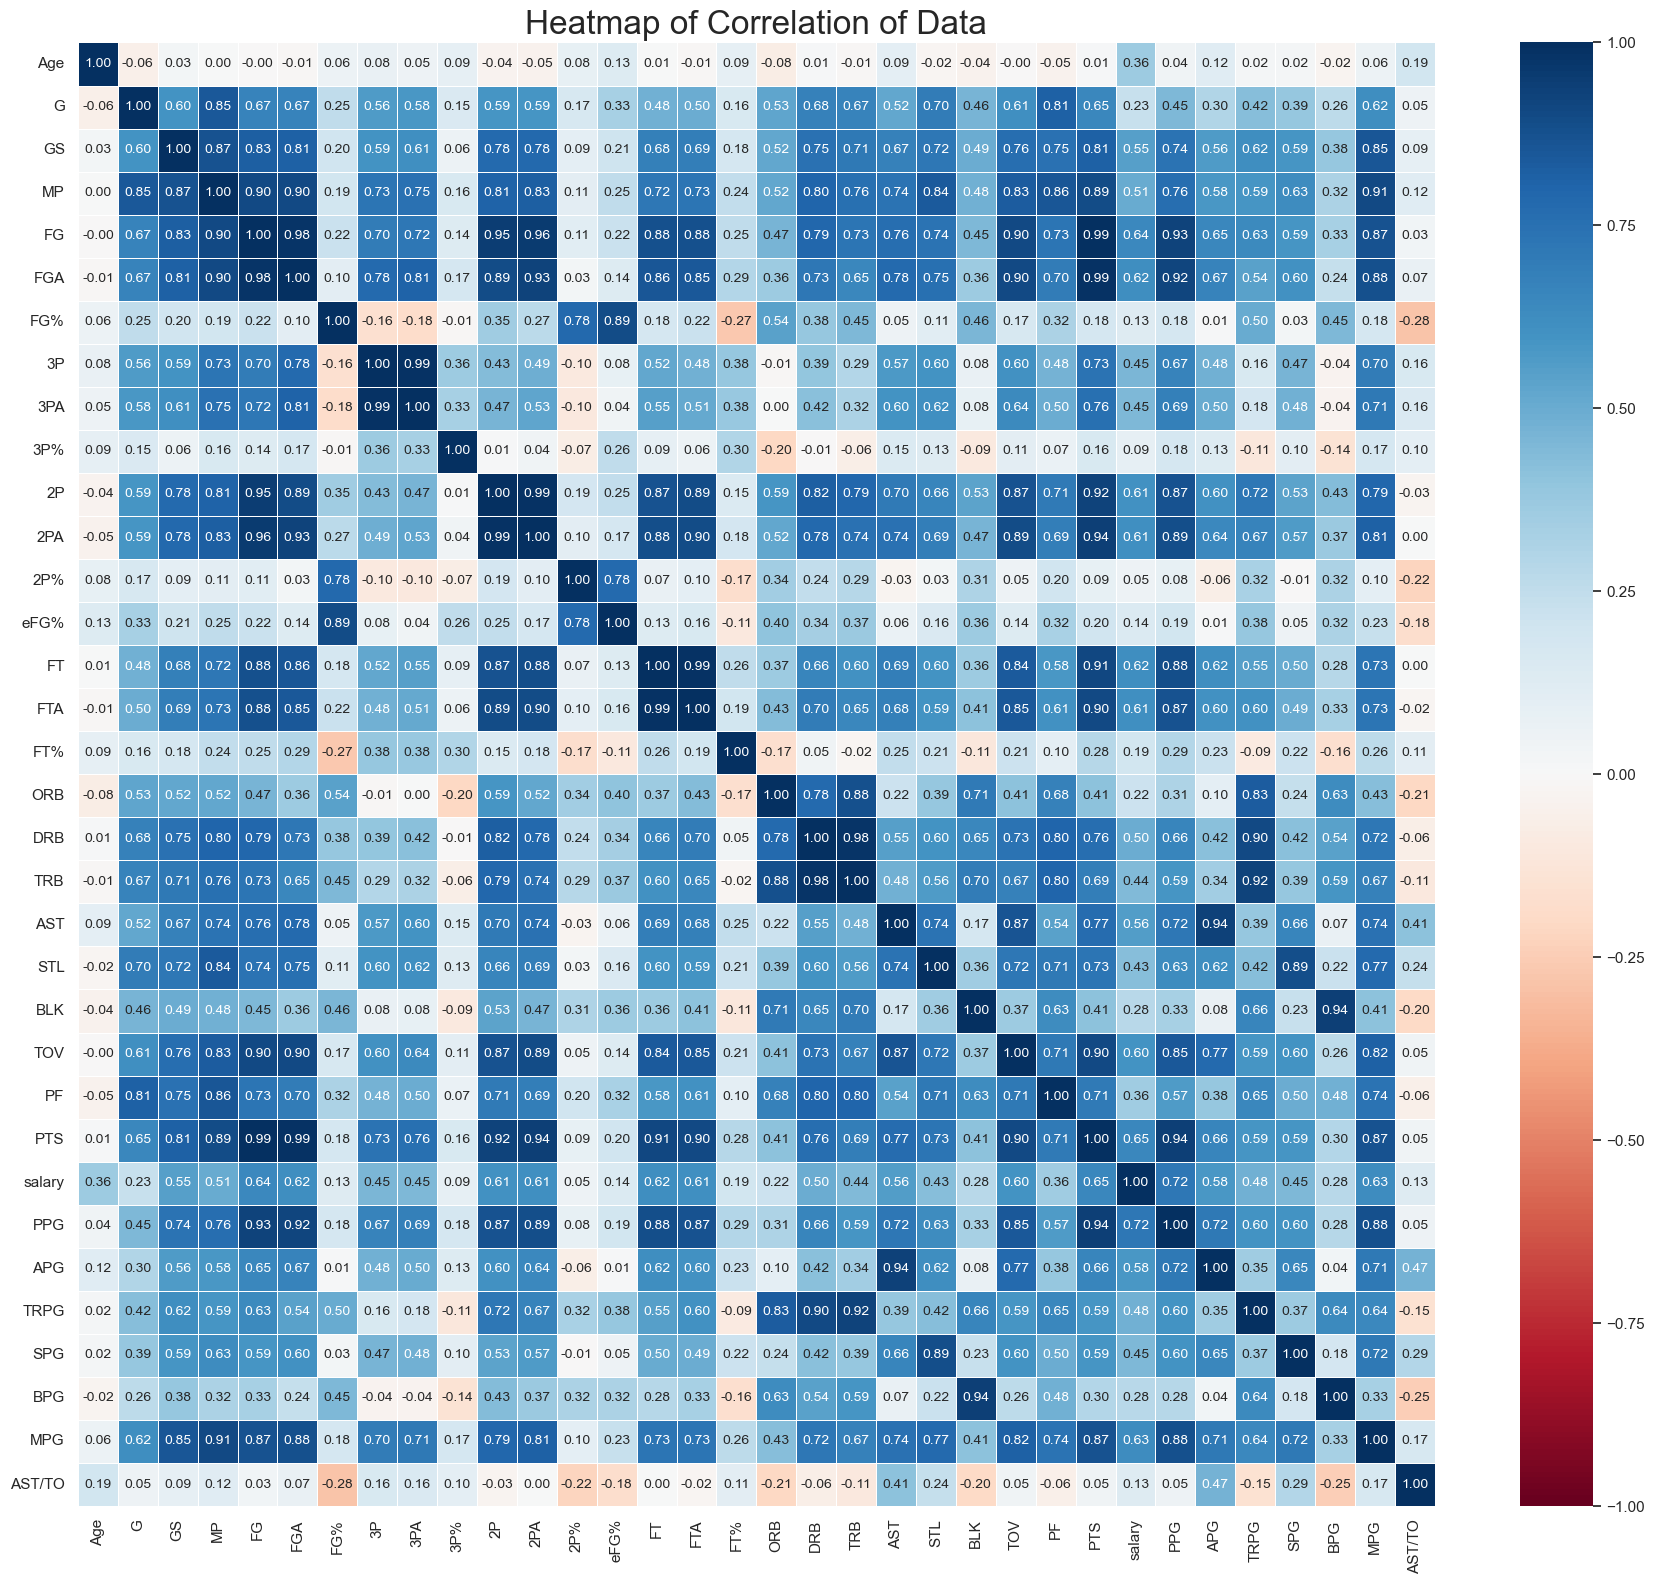

In [47]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['dollarPerMinute','dollarPerFG','dollarPerPoint'])
correlation_matrix = correlation_matrix.corr(numeric_only=True)

plt.figure(figsize=(18, 16))  # Set the figure size

# Create the heatmap of correlation matrix with improved layout
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", center=0,
            linewidths=0.5, annot_kws={"size": 10}, vmin=-1, vmax=1)

# Set title
plt.title("Heatmap of Correlation of Data", size=24)
plt.tight_layout()  # Improve layout
plt.show()

Looking along the salary row shows us that Points Per Game (PPG) has the highest value, and the lowest value is 2 Point Percentage (2P%). Let's have a look at a scatterplot of these two values vs salary, then we can grab all the values as a list for further inspection.

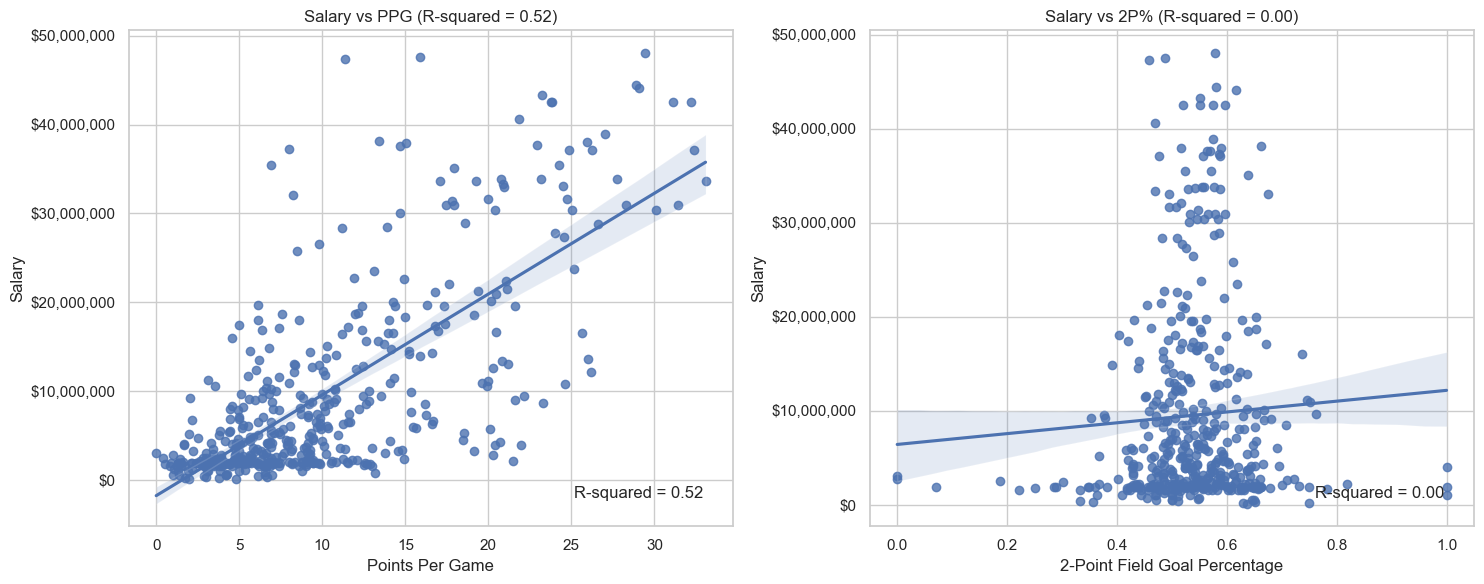

In [48]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter Plot of Salary vs PPG
sns.set(style="whitegrid")
scatter_plot1 = sns.regplot(x="PPG", y="salary", data=df, ax=axes[0])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['PPG'], df['salary'])
r_squared = r_value ** 2
axes[0].set_xlabel("Points Per Game")
axes[0].set_ylabel("Salary")
axes[0].set_title("Salary vs PPG (R-squared = {:.2f})".format(r_squared))
ax = scatter_plot1.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
axes[0].text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')

# Plot 2: Scatter Plot of Salary vs 2P%

TwoP = df[df['2P%'].notna()]

sns.set(style="whitegrid")
scatter_plot2 = sns.regplot(x="2P%", y="salary", data=TwoP, ax=axes[1])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(TwoP['2P%'], TwoP['salary'])
r_squared = r_value ** 2
axes[1].set_xlabel("2-Point Field Goal Percentage")
axes[1].set_ylabel("Salary")
axes[1].set_title("Salary vs 2P% (R-squared = {:.2f})".format(r_squared))
ax = scatter_plot2.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
axes[1].text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Looking at the scatterplot of salary vs ppg we can see a moderate, positive R squared value of 0.52. This means roughly half of salary is explained by PPG.  Meanwhile looking at salary vs 2P%, we have an R squared of 0, which means 2P% explains nothing about one's salary. Of note however, 2P% seems to be pretty evenly distributed around about 55%, perhaps meaning that you need to shoot at least that efficient if you want to stay on the floor.

Now that we've looked at the highest and lowest values in the heatmap, we'll grab a list of all the stats with relation to salary and inspect it.

In [49]:
#CORRELATION
salaryCorr = pd.DataFrame()

df2 = df.drop(columns=['dollarPerMinute','dollarPerFG', 'dollarPerPoint'], axis=1)
salaryCorr['All'] = df2.corrwith(df2['salary'], numeric_only=True).sort_values(ascending=False)[1:]

positions = ['PG', 'SG', 'SF', 'PF', 'C']
for position in positions:
    position_corr = df[df['Pos'] == position].corrwith(df['salary'], numeric_only=True).sort_values(ascending=False)[1:]
    salaryCorr[position] = position_corr

In [50]:
# Get the top 5 correlations (descending) from the 'All' column
top10 = salaryCorr[['All']].head(10)
# Rename the 'All' column for the top 5 correlations
top10.rename(columns={'All': 'Top 10 Correlation of Salary Descending'}, inplace=True)
# Apply styling to center align the data in the top 5 correlations
top10 = top10.style.set_properties(**{'text-align': 'center'})

# Get the bottom 5 correlations (ascending) from the 'All' column
bottom10 = salaryCorr[['All']].tail(10).sort_values(by='All', ascending=True)
# Rename the 'All' column for the bottom 5 correlations
bottom10.rename(columns={'All': 'Bottom 10 Correlation of Salary Ascending'}, inplace=True)
# Apply styling to center align the data in the bottom 5 correlations
bottom10 = bottom10.style.set_properties(**{'text-align': 'center'})

display(top10, bottom10)

,Top 10 Correlation of Salary Descending
PPG,0.722858
PTS,0.652559
FG,0.643683
MPG,0.630499
FGA,0.623244
FT,0.621678
FTA,0.613507
2PA,0.610352
2P,0.608308
TOV,0.598179


,Bottom 10 Correlation of Salary Ascending
2P%,0.053687
3P%,0.086511
AST/TO,0.125123
FG%,0.128971
eFG%,0.142849
FT%,0.188191
ORB,0.218151
G,0.230807
BLK,0.279421
BPG,0.280665


The top 10 stats most correlated with scoring are all to do with scoring, scoring attempts, and oddly turnovers.  An explanation for turnovers being so high is that the players who make and score the most have the ball in their hands most of the time, and therefore the more often you have the ball the more you'll turn over the ball.  If the ball isn't in your hands you can't score, so it just comes with the territory.

Conversely, the bottom 10 stats consist of 5 shooting effiency stats, blocks, offensive rebounds, assist to turnover ratio, and interestingly enough number of games played. Since player's contracts are guaranteed the games played stat is probably offset by players who were injured and still received large paycheques from conracts they signed previously.

The immediate impression we can take away that with regards to salary is it doesn't matter how efficent you are, it's about how much pure volume you are able to score.

While it's clear that pure scoring volume is the most important thing where salary is involved across the league, it's worth investigating if anything changes per position.  For example, a Point Guard has a vastly different responsiblity on the floor than the Center does.  We can expect scoring to stay constant amongst positions, but we might suspect that assists could crack the top 5 for Point Guards, and perhaps blocks for Centers.

**Top 5 Stats correlated with Salary Descending**

In [56]:
# Create HTML table for each dataframe with a bit of padding
PG = salaryCorr[['PG']].nlargest(5, 'PG')
SG = salaryCorr[['SG']].nlargest(5, 'SG')
SF = salaryCorr[['SF']].nlargest(5, 'SF')
PF = salaryCorr[['PF']].nlargest(5, 'PF')
C = salaryCorr[['C']].nlargest(5, 'C')


# Display side by side tables using HTML
display(PG, SG, SF, PF, C)

,PG
PPG,0.66
PTS,0.62
FG,0.62
APG,0.61
MPG,0.61


,SG
PPG,0.71
PTS,0.66
FGA,0.65
FG,0.65
3P,0.64


,SF
PPG,0.72
APG,0.69
MPG,0.57
2PA,0.56
2P,0.56


,PF
PPG,0.75
APG,0.71
PTS,0.67
FG,0.66
FT,0.65


,C
PPG,0.82
PTS,0.78
FGA,0.78
FG,0.77
MPG,0.76


Indeed, the criteria for financial success in the NBA *does* differ per position. Of course PPG stays at the top, but there are differences in stats and also rankings per position worth noting:

- **Point Guards** Assists per Game (APG) is the first new stat and it comes in at 4th, like we suspected it might. This means that while the era of the "score first" point guard is indeed here, it's beneficial for Point Guards to find teammates who are able to generate them assists.

- **Shooting Guards** as expected are paid for their shooting. Klay Thompson once said "They pay me to shoot", and he indeed wasn't lying. Field Goal attempts are ranked 3rd above, even Field Goals made. Finally, the number of 3 point shot made rounds out the top 5, starting to show some of the importance of the 3 point shot in regards to salary. Intuitively this makes sense for the position, a shooting guard should be expected to score from all distances.

- **Small Forwards** have APG ranked 2nd, which is even higher than the PG position, that's interesting for sure. Back in the 90s Scottie Pippen pioneered the "Point Forward" position with Michael Jordan's Chicago Bulls, and it seems the position has evolved even more to the current day. Perhaps it is expected for the PG to be able to create assists, and in SFs it's financialy rewarded because it's a rarer skill at the position.

- **Power Forwards** also have APG in second. It's interesting to see APG be Top 5 in 3 of the 5 positions, yet absent in the top 10 for when ranking all positions.

- **Center** contains all the stats from the league wide top 5, albeit in a different order. Notably however is the whopping 0.81 correlation that PPG has at the Center position, meaning that this position is all about scoring no matter how.

**Bottom 5 Stats correlated with Salary Ascending**

In [57]:
# Create HTML table for each dataframe with a bit of padding
PG_small = salaryCorr[['PG']].nsmallest(5, 'PG')
SG_small = salaryCorr[['SG']].nsmallest(5, 'SG')
SF_small = salaryCorr[['SF']].nsmallest(5, 'SF')
PF_small = salaryCorr[['PF']].nsmallest(5, 'PF')
C_small = salaryCorr[['C']].nsmallest(5, 'C')


# Display side by side tables using HTML
display(PG_small, SG_small, SF_small, PF_small, C_small)

,PG
AST/TO,0.02
3P%,0.04
FT%,0.19
G,0.23
2P%,0.28


,SG
AST/TO,0.00
2P%,0.03
FT%,0.14
FG%,0.19
eFG%,0.21


,SF
2P%,0.02
G,0.07
AST/TO,0.13
eFG%,0.15
PF,0.16


,PF
2P%,0.02
FG%,0.13
eFG%,0.16
AST/TO,0.16
ORB,0.16


,C
3P%,-0.03
2P%,0.02
FG%,0.03
eFG%,0.05
Age,0.10


It seems that across all positions, your shooting percentages are not actually all that important. Some other observations:

- **Point Guards** The assists to turnover ratio doesn't seem to matter at *all*. Obviously turning over the basketball is bad, but the amount of assists a player dishes out with regards to how many turnovers they make trying to get those assists doesn't seem to matter.  Also total games played doesn't seem to matter, which probably has to do with guaranteed contracts. If a player is injured, they make that money regardless.

- **Shooting Guards** Not a single percentage matters, not one. It seems that good shooting percentages keep you on the floor (coach will sub you out if you aren't making shots), but shooting volume is what gets you paid at the SG.

- **Small Forwards** The SF position seems similar to the PG position, nothing here that hasn't really been covered above.

- **Power Forwards** The only thing that stands out here is that Offensive Rebounds (ORB), as valuable as they are to the team success, have little impact on salary.

- **Center** Interestingly enough, the Center position is the only catergory to have a stat with a negative correlation, 3P%. So the *worse* your 3 point shooting is, the more you seem to make (very little, but it's there).  What's probably happening here is that most Centers aren't evaluated on their 3PT shooting, it's just a bonus if you have it. The best Centers probably have a lower 3P% than rest, so their collective salary weight brings the stat in to the negative.  You could do more digging here, but since the correlation is so low (-.03), it's likely not worth more than a casual glance.

### Categorical Variables:


##### **Salary vs Age**:

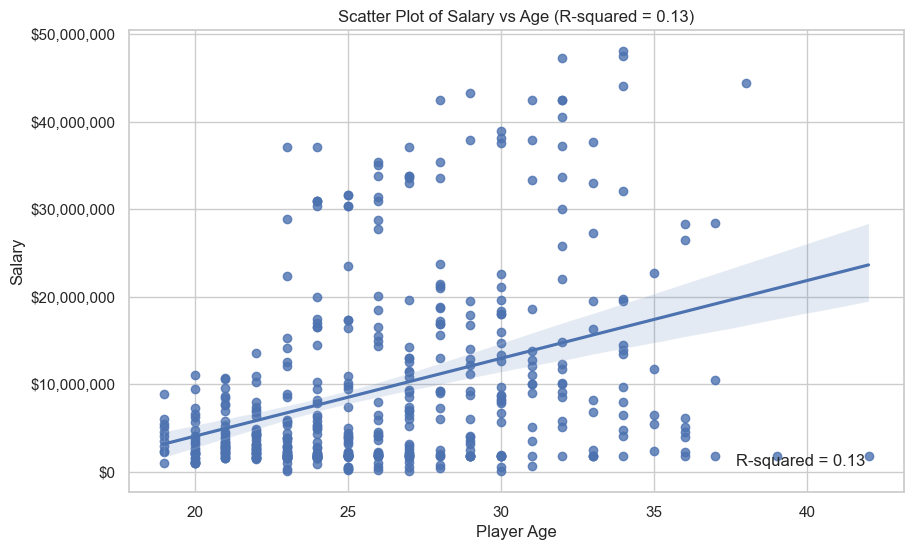

In [64]:
# Set the figure size and style of the plot
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   
# Create the scatter plot
scatter_plot = sns.regplot(x="Age", y="salary", data=df)
# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['Age'], df['salary'])
r_squared = r_value ** 2
# Add labels and title
plt.xlabel("Player Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs Age (R-squared = {:.2f})".format(r_squared))
# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Display R-squared value on the plot
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')
# Show the plot
plt.show()

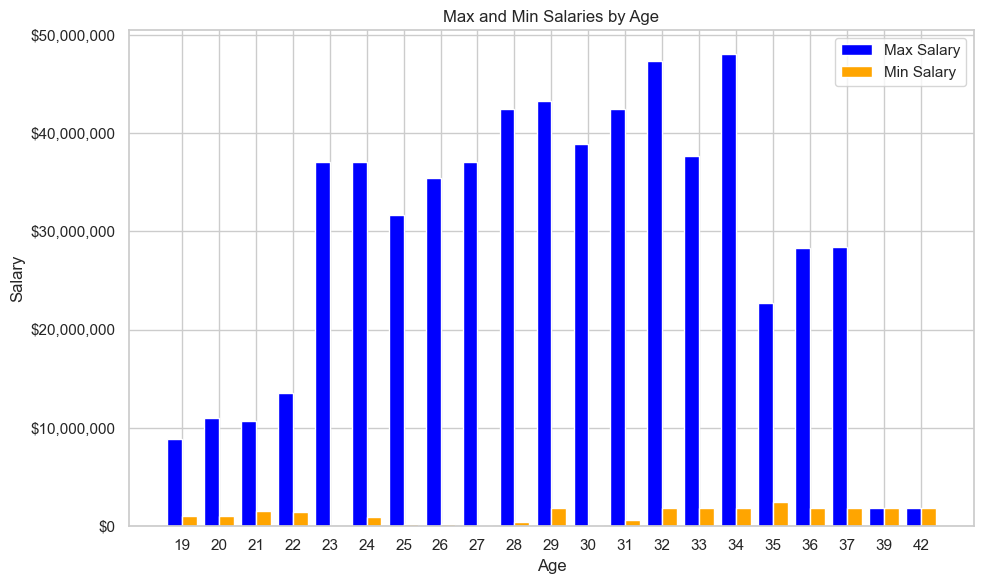

In [65]:
min_salary_indices = df.groupby('Age')['salary'].idxmin()
max_salary_indices = df.groupby('Age')['salary'].idxmax()

test_max = df.loc[max_salary_indices, ['Age', 'salary']]
test_min = df.loc[min_salary_indices, ['Age', 'salary']]
test_min = test_min[test_min['Age'] != 38]

# Combine the data for plotting
combined_data = test_max.merge(test_min, on='Age', suffixes=('_max', '_min'))

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a grouped bar plot with bars beside each other
bar_width = 0.4  # Adjust the bar width to your preference

ages = np.arange(len(combined_data))
sal_plot = plt.bar(ages, combined_data['salary_max'], width=bar_width, color='blue', label='Max Salary')
sal_plot = plt.bar(ages + bar_width, combined_data['salary_min'], width=bar_width, color='orange', label='Min Salary')

plt.xticks(ages + bar_width / 2, combined_data['Age'])
plt.xlabel('Age')
plt.ylabel('Salary')

# Customize y-axis tick formatting as dollar values
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(dollar_format))

plt.title('Max and Min Salaries by Age')
plt.legend()

plt.tight_layout()
plt.show()


There is a weaker than expected relationship between salary and a player's age.  Although players younger than about 23 struggled to break the 10 million a year mark, at about 24 salary takes off and doesn't drop until much later (after 37 or so). This can be explained through a look at how NBA rookie contracts work.  Players selected in the first round of the NBA draft are signed to standard deals that are 2 years long, with the team retaining the option to extend that rookie contract for up to an additional 2 years if they wish.  After that, players and teams are able to engage in contract extensions, which allow the player to re-sign a player up to 35 percent of the salary cap with 8 percent escalation in each subsequent year.  This explains the salary take off at about 24, players are done with their rookie contract and the rising stars worth big extensions get them signed and see an explosion in salary.

From that point on salaries are tied to the league's salary cap as a percentage and/or up to 105% of the player's salary for the previous season. This means that players who are able to keep up their level of play later in to their thirties can continue to receive increasing contract offers and extensions. It seems that age has less of a bearing on salary than perhaps it used to. 

##### **3P% vs Salary**:

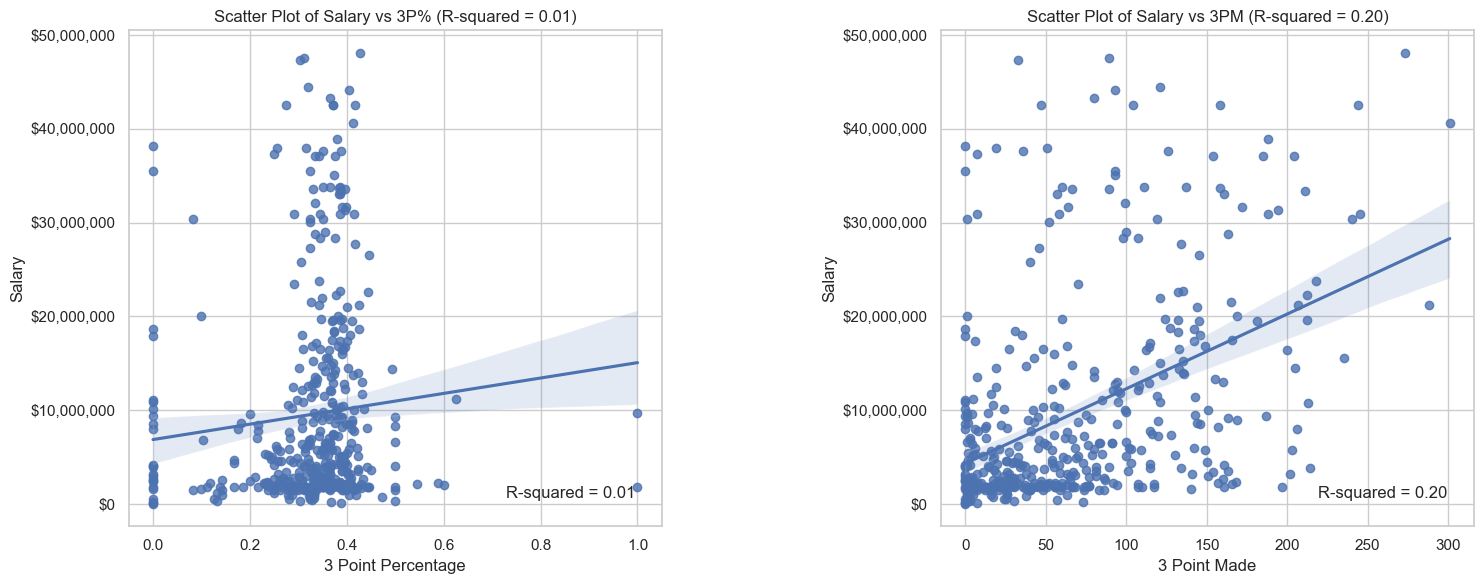

In [66]:
# Filter the data
result = df[df['3P%'].notna()]

# Set the figure size and style of the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # Creating a 1x2 grid of subplots
sns.set(style="whitegrid")

# Create the first scatter plot
scatter_plot1 = sns.regplot(x="3P%", y="salary", data=result, ax=axes[0])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['3P%'], result['salary'])
r_squared = r_value ** 2
axes[0].set_xlabel("3 Point Percentage")
axes[0].set_ylabel("Salary")
axes[0].set_title("Scatter Plot of Salary vs 3P% (R-squared = {:.2f})".format(r_squared))
ax0 = scatter_plot1.axes
ax0.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax0.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')

# Create the second scatter plot
scatter_plot2 = sns.regplot(x="3P", y="salary", data=result, ax=axes[1])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['3P'], result['salary'])
r_squared = r_value ** 2
axes[1].set_xlabel("3 Point Made")
axes[1].set_ylabel("Salary")
axes[1].set_title("Scatter Plot of Salary vs 3PM (R-squared = {:.2f})".format(r_squared))
ax1 = scatter_plot2.axes
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax1.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')

# Adjust layout
plt.tight_layout()

# Show the combined subplot
plt.show()


Surprisingly, 3 point percentage has almost no relationship with salary.  The mean 3P% seems to be about 33%, and really has no bearing on how much a player gets paid. Considering the emphasis on 3 point shooting we might have expected salary to be tied closer to 3P%, but clearly this is not the case.

Looking at the total number of 3 point shots made has a closer relationship with salary. What this could suggest is that it matters less if you're an accurate shooter who doesn't shoot often, versus being less efficient but letting it fly.  While 3 point shooting has been overall more emphasized in the league, it's probably safe to assume that the Center position is asked to shoot it less than the PG and SG positions are. It could be worth investigating this relationship by each position to see if there's more to see.

## **Conclusion**:

In conclusion, our exploratory data analysis (EDA) on NBA salaries has unveiled valuable insights into the intricate landscape of player compensation within the league. Through a meticulous examination of various factors such as player performance metrics, tenure, and team affiliations, we've gained a deeper understanding of the underlying trends and patterns shaping salary distributions.

Our analysis revealed that performance metrics, including points per game, assists, and rebounds, significantly impact player salaries. Moreover, we observed intriguing dynamics in the influence of team tenure on compensation, suggesting that loyalty and longevity with a particular franchise can play a role in salary negotiations.

The exploration of salary distributions across different teams shed light on the varying financial structures within the league, highlighting disparities that warrant further investigation. Additionally, our findings emphasized the importance of considering contract types, endorsements, and other off-court revenue streams in comprehensively understanding a player's total income.

As we navigate the complex terrain of NBA salaries, it becomes evident that future research endeavors should delve deeper into the evolving landscape of player compensation, incorporating real-time data and accounting for external factors such as market dynamics and endorsement deals. This exploratory data analysis serves as a foundational step in unraveling the multifaceted nature of NBA salaries, providing a valuable framework for future investigations and strategic decision-making within the basketball industry.

Our analysis on salaries within the NBA has shown a landscape that is different to what is commonly parrotted across the league and its media.  We discovered that the league is significantly skewed towards the wealthy, with the mean salary doubling the median salary at every position. We saw that there are 10 statistical outliers, with all of them being on the maximum value contract they could sign.  These outliers also showed us that players are able to stay in their primes longer, with most of these max players being older than 30 and still playing close to their peak.

We looked at shooting percentages and found that they are a false idol in the efficienct era of basketball. It seems that shooting a good shooting percentage keeps you on the floor (which is important for players looking to secure that next big contract), but ultimately it's about total baskets made that gets a player their money.  Shooting percentages were almost bottom 5 of importance for every position on the floor, while baskets made and points per game were near the top 5.

Ultimately the take aways a player would want to get from this is that if they want to secure a large contract in their next negotiation, they need to focus on scoring no matter how.  Ideally you would want to maybe pick what you are best at, and focus on doing that as best as you can, or maybe looking at somewhere you are below average that you feel you can make significant improvements in.  Importantly, if you are not a 3 point shooter, this shows you aren't required to do it (despite what the league would tell you) as long as you have other ways of scoring.

If you are a general manager reading this, looking to sign a promising player before their value rises outside of your budget, the same ideas apply. Don't fall in love with percentages, look at their actual scoring output.  As points per game is the single most important stat with regards to salary, be aware that any defeciencies in other categories won't influence their price on the market.